# Plotting with categorical data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('seaborn-ticks')
%matplotlib inline

    在 seaborn 中，有几种不同的方法可以可视化分类数据的关系。与 relplot() 与 scatterplot() 或 lineplot() 之间的关系类似，有两种方法可以制作这些图。有许多axes-level函数用于以不同的方式绘制分类数据，以及一个figure-level接口catplot()，该接口提供了对它们的统一的更高级别的访问。


    将不同分类绘图类型可被划分为三种不同系列类型：

    Categorical scatterplots:
    stripplot() (with kind="strip"; the default)
    swarmplot() (with kind="swarm")

    Categorical distribution plots:
    boxplot() (with kind="box")
    violinplot() (with kind="violin")
    boxenplot() (with kind="boxen")

    Categorical estimate plots:
    pointplot() (with kind="point")
    barplot() (with kind="bar")
    countplot() (with kind="count")

    这些系列使用不同的 granularity 级别表示数据。需要根据不同的问题，选择不同的的绘图方法。统一的 API 可以轻松地在不同类型的类型之间切换，并从多个角度观察数据。
    
    这里主要关注figure-level函数 catplot()。此函数是上述函数的高级接口。

## Categorical scatterplots

    catplot() 中数据的默认表示形式使用散点图。
    在 seaborn 中实际上有两种不同的分类散点图。他们采用不同的方法来解决使用散点图表示分类数据的主要挑战，即属于一个类别的所有点将沿着与分类变量对应的轴落在同一位置。
    stripplot() 是 catplot() 中的默认“kind”，其使用的方法是使用少量的随机“抖动”来调整分类轴上点的位置，便于观察：

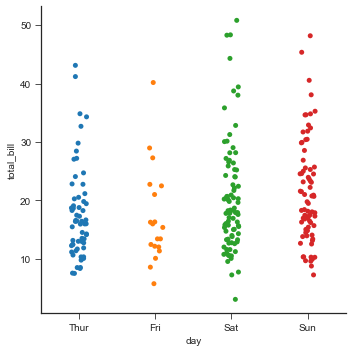

In [2]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

    jitter参数控制抖动的幅度也可以完全禁用抖动：

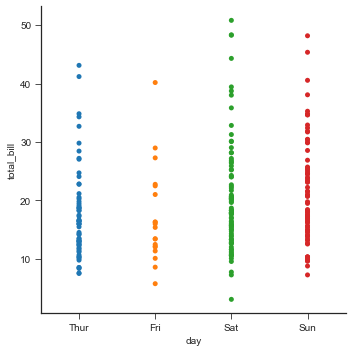

In [3]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

    第二种方法使用防止点重叠的算法是沿分类轴调整点。它可以更好地表示观测值的分布，尽管它仅适用于相对较小的数据集。
    这种绘图方法被称为'swarm'，由swarmplot()在seaborn中绘制，也可通过在catplot()中设置kind=“swarm”来激活：

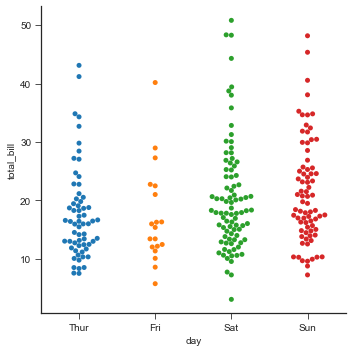

In [4]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

    与关系图类似，可以使用hue语义向分类图添加另一个维度。（分类图当前不支持size或style语义）。每个不同的分类绘图函数以不同的方式处理色调语义。对于散点图，只需更改点的颜色：

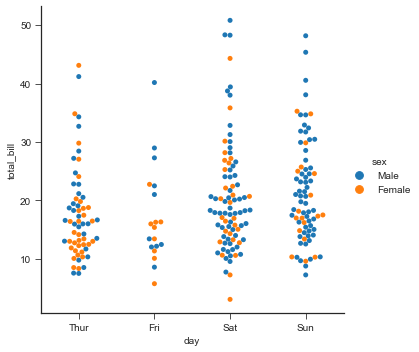

In [5]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

    与数值数据不同，如何沿其轴对分类变量的水平进行排序并不总是显而易见的。通常，seaborn 分类绘制函数尝试从数据中推断类别的顺序。如果数据具有 pandas Categorical 数据类型，则默认顺序Categorical的顺序。如果传递到分类轴的变量看起来是数值，则将对级别进行排序。但是，即使使用数字来标记数据，数据仍被视为分类数据，并在分类轴上的序号位置（特别是 0、1、...）绘制：

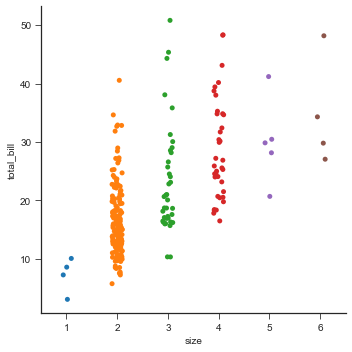

In [6]:
sns.catplot(x="size", y="total_bill", data=tips)

    order 参数可用于指定x轴类别的排序。

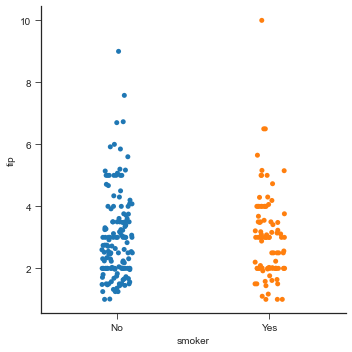

In [7]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

    “分类轴”在上面的示例中，对应于水平轴。但有时将分类变量放在垂直轴上也很有用（特别是当类别名称相对较长或有许多类别时）。

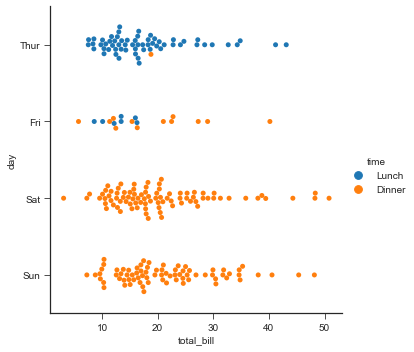

In [8]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

## Distributions of observations within categories

    随着数据集大小的增长，分类散点图在提供关于每个类别中值分布的信息方面会受到限制。发生这种情况时，有几种方法可以汇总分布信息，以便于跨类别级别轻松比较。

### Boxplots

    第一个是 boxplot()。这种图显示了分布的三个四分位数值以及极值。“whiskers”延伸到位于上下四分位数1.5倍IQR内的点，然后独立显示超出此范围的观测值。这意味着箱线图中的每个值都对应于数据中的实际观测值。

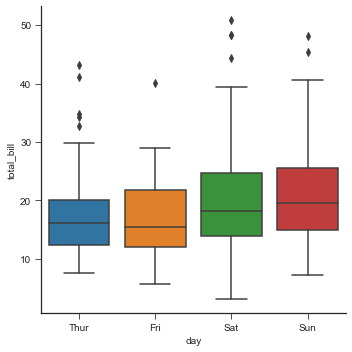

In [9]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

    添加hue语义时，语义变量的每个级别的框将沿分类轴移动，使其不会重叠：

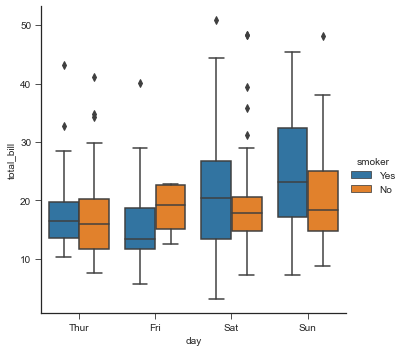

In [10]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

    此行为被称为"dodging"，默认情况下处于打开状态，如果不打开，会导致混乱。

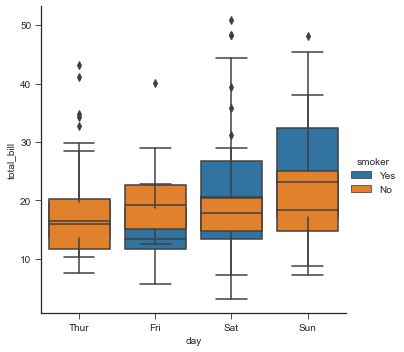

In [15]:
kwargs = dict(alpha = 0.5)
fig = sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="box", dodge=False, data=tips)

    在绘图时，Seaborn假定hue语义变量嵌套在主分类变量中。如果不是这种情况，可以禁用 dodging。

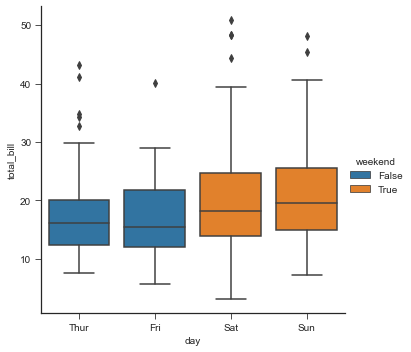

In [16]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

    另一个相关函数 boxenplot() 绘制类似于箱形图的增强箱型图，对显示有关分布形状的更多信息进行了优化。它最适合较大的数据集：

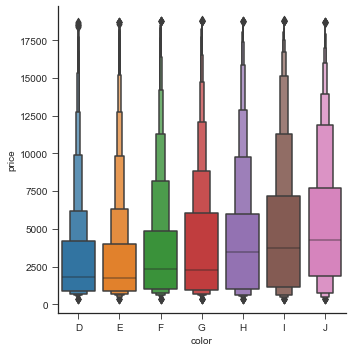

In [17]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

### Violinplots

    另一种分类变量的分布绘图方法是 violinplot()，它将箱线图与核密度估计过程相结合：

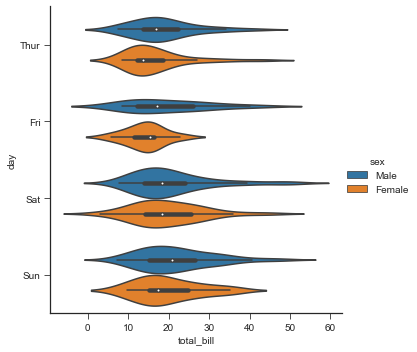

In [18]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips)

    此方法使用核密度估计值来提供更丰富的值分布描述。此外，箱形图中的四分位数和whisker值显示在小提琴内部。
    缺点是，由于 violin 图使用KDE，因此还有其他一些参数可能需要调整，这增加了一些相对于简单箱线图的复杂性：

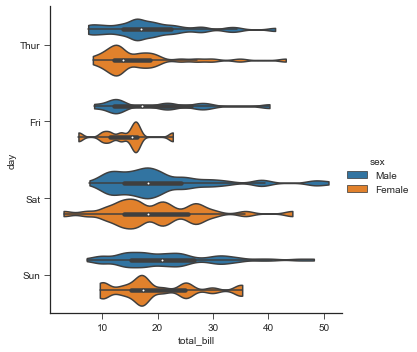

In [19]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips)

    当hue参数只有两个级别时，也可以"split" violins图，这可以更有效地利用空间：

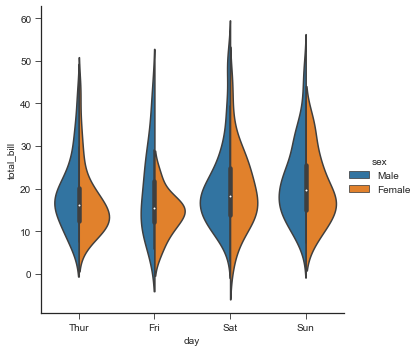

In [20]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)

    最后，在violine图有几个选项，包括显示观察值而不是摘要箱型图。

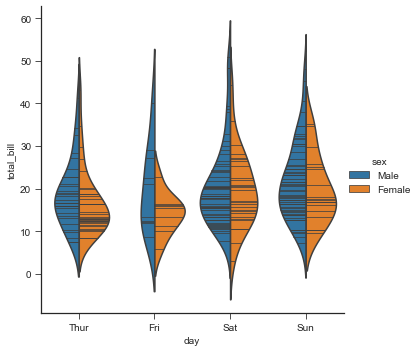

In [22]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True, data=tips)

    将 swarmplot() 或 striplot() 与箱形图或小提琴图相结合，以显示每个观测值以及分布摘要也很有用：

<AxesSubplot:xlabel='day', ylabel='total_bill'>

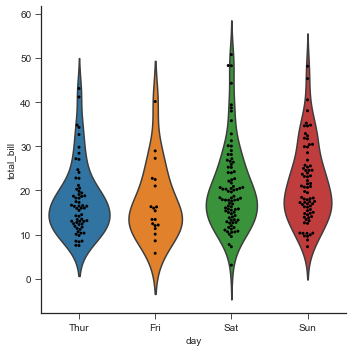

In [23]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

## Statistical estimation within categories

    对于其他气矿，可能需要展示集中趋势的估计值，而不是显示每个类别中的分布。Seaborn有两种主要方式来可视化这些信息。重要的是，这些函数的基本 API 与上面讨论的函数的基本 API 相同。

### Bar plots

    实现可视化集中趋势的常用绘图方法是条形图。在 seaborn 中，barplot() 函数对完整数据集进行操作，并应用函数来获取估计值（默认采用平均值）。当每个类别中有多个观测值时，它还使用bootstrapping来计算估计值周围的置信区间，该置信区间使用误差线绘制：

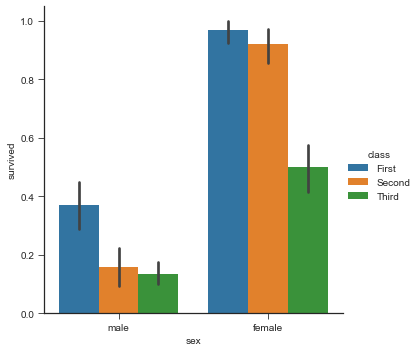

In [24]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

    条形图的一个特例是，当显示每个类别中的观测值数，而不是计算第二个变量的统计数据时。这类似于分类变量（而不是定量变量）上的直方图。在 seaborn 中，使用 countplot() 函数很容易做到这一点：

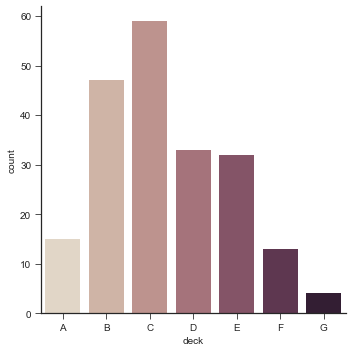

In [25]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

    barplot() 和 countplot() 都可以使用上面讨论的所有选项以及每个函数的详细文档中演示的其他选项来调用：

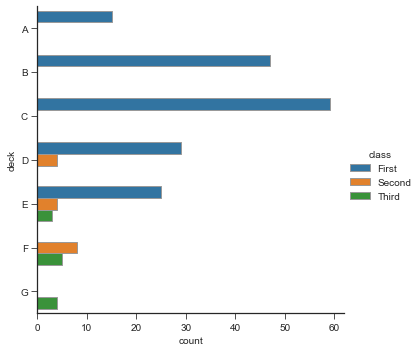

In [26]:
sns.catplot(y="deck", hue="class", kind="count",
            edgecolor=".6",data=titanic)

### Point plots

    pointplot() 函数提供了一种用于可视化相同信息的替代样式。
    此函数还使用另一个轴上的高度对估计值进行编码，但它不是显示完整的条形，而是绘制点估计值和置信区间。
    此外，pointplot() 连接来自同一色相类别的点。可以很容易地看出主要关系随着hue语义的变化趋势。

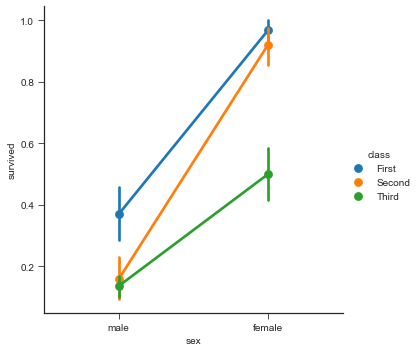

In [27]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

    虽然分类函数缺少关系函数的style语义，但改变marker和或linestyle以及hue仍然不错的选择，可增加图形的可辨识度：

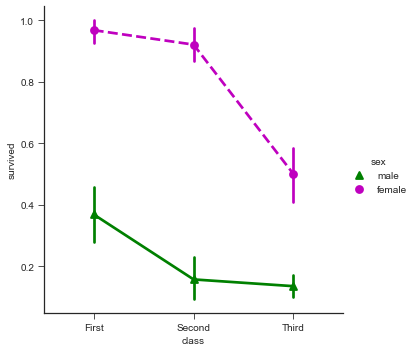

In [28]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

## Plotting “wide-form” data

    虽然使用"long-form"或“整洁”的数据是首选，但这些功能也可以通过应用于各种格式的“宽格式”数据，包括pandas DataFrames或二维numpy数组。这些对象应直接传递给 data 参数：

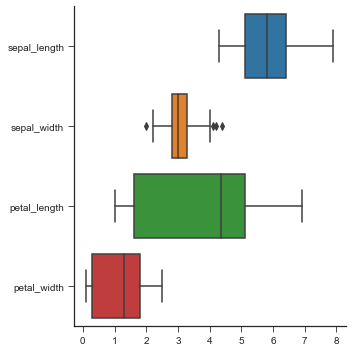

In [29]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box")

    此外，axes-level函数接受Pandas 或 numpy 对象的向量，而不是 DataFrame 中的变量：

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

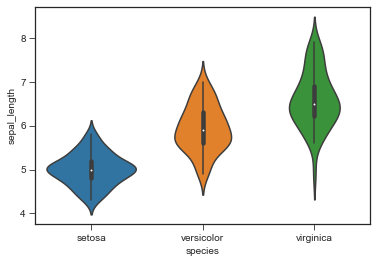

In [30]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

    要控制由axes-level函数创建的绘图的大小和形状，必须使用 matplotlib 命令自行设置图形：

<AxesSubplot:xlabel='count', ylabel='deck'>

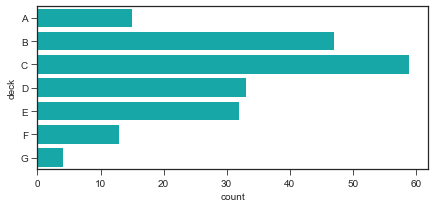

In [32]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c")

## Showing multiple relationships with facets

    就像 relplot() 一样，catplot() 同样是建立在 FacetGrid 的基础上，意味着很容易添加变量分配给faceting来可视化更高维的关系：

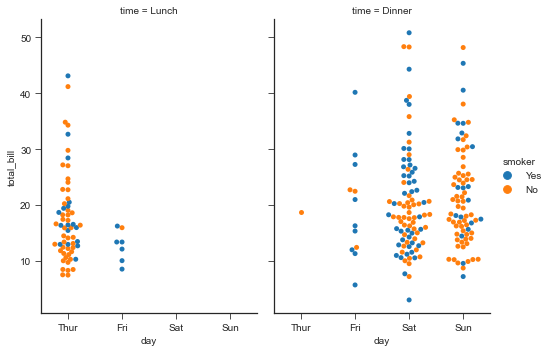

In [33]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.7,
            kind="swarm", data=tips)

    若要进一步自定义绘图，可以在它返回的 FacetGrid 对象上使用set方法，传入matlibplot的figure相关设置选项：

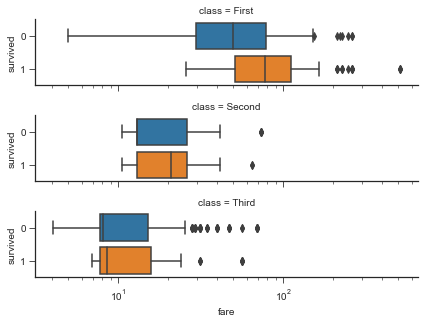

In [34]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")